# Optimal Skills
## What is the most optimal skill to learn for Data Analysts ?
### Methodology
1) Group skills to determine median salary and likelihood of being in posting
2) Visualize median salary vs percent skill demand
3) Determine if certain technologies are more relevant

In [1]:
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
df = pd.read_csv('data_jobs_dataset.csv')

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'],dayfirst=True)
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
df.head()

,Unnamed: 0,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:00,False,False,United States,NaN,NaN,NaN,Boehringer Ingelheim,NaN,NaN
1,1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:00,False,False,Mexico,NaN,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:00,False,False,Germany,NaN,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:00,True,False,United States,NaN,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:00,False,False,Sudan,NaN,NaN,NaN,Kristina Daniel,"[bash, python, oracle, aws, ansible, puppet, j...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."


In [3]:
df.isnull().sum()

Unnamed: 0                    0
job_title_short               0
job_title                     1
job_location               1045
job_via                       8
job_schedule_type         12667
job_work_from_home            0
search_location               0
job_posted_date               0
job_no_degree_mention         0
job_health_insurance          0
job_country                   0
salary_rate              752674
salary_year_avg          763738
salary_hour_avg          775079
company_name                 18
job_skills               117037
job_type_skills          117037
dtype: int64

In [4]:
df.drop(columns=['job_location','job_via','salary_rate','salary_hour_avg'],inplace=True)

In [5]:
df.columns

Index(['Unnamed: 0', 'job_title_short', 'job_title', 'job_schedule_type',
       'job_work_from_home', 'search_location', 'job_posted_date',
       'job_no_degree_mention', 'job_health_insurance', 'job_country',
       'salary_year_avg', 'company_name', 'job_skills', 'job_type_skills'],
      dtype='object')

In [6]:
df.isnull().sum()

Unnamed: 0                    0
job_title_short               0
job_title                     1
job_schedule_type         12667
job_work_from_home            0
search_location               0
job_posted_date               0
job_no_degree_mention         0
job_health_insurance          0
job_country                   0
salary_year_avg          763738
company_name                 18
job_skills               117037
job_type_skills          117037
dtype: int64

In [7]:
df_DA = df[df['job_title'] == 'Data Analyst'].copy()

In [8]:
df_DA= df_DA.dropna(subset=['salary_year_avg'])
df_DA_exploded = df_DA.explode('job_skills')
df_DA_exploded[['salary_year_avg','job_skills']].head(5)

,salary_year_avg,job_skills
1681,111175.0,sql
1681,111175.0,tableau
1681,111175.0,power bi
1681,111175.0,excel
2390,70000.0,c


In [9]:
df_DA_skills = df_DA_exploded.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='count',ascending=False)
df_DA_skills = df_DA_skills.rename(columns={'count':'skill_count','median':'median_salary'})
DA_job_count = len(df_DA)
df_DA_skills['skill_percent'] = (df_DA_skills['skill_count'] / DA_job_count)*100
df_DA_skills = df_DA_skills[df_DA_skills['skill_count'] > 0]
df_DA_skills

,skill_count,median_salary,skill_percent
job_skills,,,
sql,839,90000.00,64.094729
excel,539,80000.00,41.176471
python,490,94935.75,37.433155
tableau,458,90000.00,34.988541
power bi,319,87500.00,24.369748
...,...,...,...
selenium,1,82500.00,0.076394
chef,1,100500.00,0.076394
chainer,1,100000.00,0.076394


## Median Salary VS Percent Skill Demand

In [10]:
skill_limit = 5
df_DA_skills_high_demand = df_DA_skills[df_DA_skills['skill_percent'] > skill_limit]

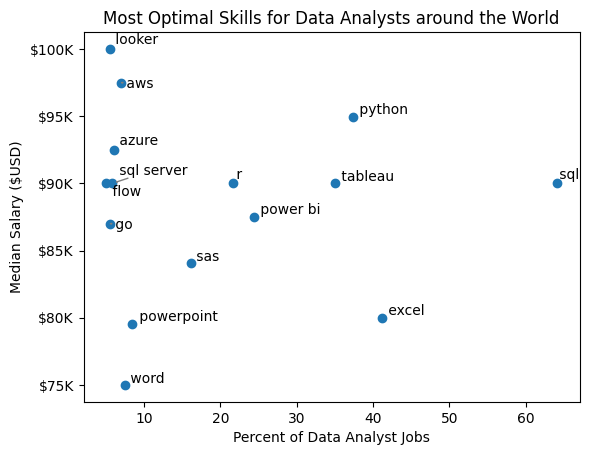

In [11]:
from adjustText import adjust_text
plt.scatter(df_DA_skills_high_demand['skill_percent'],df_DA_skills_high_demand['median_salary'])
plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Salary ($USD)')
plt.title('Most Optimal Skills for Data Analysts around the World')

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y,pos: f'${int(y/1000)}K'))

texts = []
for i, txt in enumerate(df_DA_skills_high_demand.index):
    texts.append(plt.text(df_DA_skills_high_demand['skill_percent'].iloc[i], df_DA_skills_high_demand['median_salary'].iloc[i], " " + txt))
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))
plt.show()

In [12]:
df_technology = df['job_type_skills'].copy()

# remove duplicates
df_technology = df_technology.drop_duplicates()

# remove NaN values
df_technology = df_technology.dropna()

# combine all dictionaries into one
technology_dict = {}
for row in df_technology:
    row_dict = ast.literal_eval(row)  # convert string to dictionary
    for key, value in row_dict.items():
        if key in technology_dict:  # if key already exists in technology_dict, add value to existing value
            technology_dict[key] += value
        else:                       # if key does not exist in technology_dict, add key and value
            technology_dict[key] = value

# remove duplicates by converting values to set then back to list
for key, value in technology_dict.items():
    technology_dict[key] = list(set(value))

technology_dict

{'analyst_tools': ['sap',
  'datarobot',
  'esquisse',
  'splunk',
  'microstrategy',
  'powerpoint',
  'spss',
  'excel',
  'ms access',
  'alteryx',
  'sas',
  'outlook',
  'qlik',
  'spreadsheet',
  'sharepoint',
  'visio',
  'ssrs',
  'ssis',
  'powerbi',
  'cognos',
  'power bi',
  'sheets',
  'word',
  'dax',
  'nuix',
  'looker',
  'msaccess',
  'tableau'],
 'programming': ['clojure',
  'sass',
  'perl',
  'delphi',
  'pascal',
  'visualbasic',
  'apl',
  'mongo',
  'groovy',
  'html',
  'r',
  'no-sql',
  'matlab',
  'scala',
  'erlang',
  'crystal',
  'sas',
  'fortran',
  'typescript',
  'sql',
  'ruby',
  'go',
  'bash',
  'cobol',
  'visual basic',
  'c++',
  'c',
  'assembly',
  'julia',
  'ocaml',
  'dart',
  'elixir',
  't-sql',
  'vb.net',
  'rust',
  'kotlin',
  'c#',
  'swift',
  'css',
  'lisp',
  'haskell',
  'java',
  'objective-c',
  'f#',
  'mongodb',
  'powershell',
  'golang',
  'python',
  'solidity',
  'php',
  'vba',
  'nosql',
  'javascript',
  'lua',
  'sh

In [14]:
df_technology = pd.DataFrame(list(technology_dict.items()), columns=['technology', 'skills'])
df_technology = df_technology.explode('skills')
df_technology

,technology,skills
0,analyst_tools,sap
0,analyst_tools,datarobot
0,analyst_tools,esquisse
0,analyst_tools,splunk
0,analyst_tools,microstrategy
...,...,...
9,sync,microsoft teams
9,sync,unify
9,sync,symphony
9,sync,rocketchat


In [15]:
df_DA_skills_tech = df_DA_skills.merge(df_technology, left_on='job_skills', right_on='skills')
df_DA_skills_tech

,skill_count,median_salary,skill_percent,technology,skills
0,839,90000.00,64.094729,programming,sql
1,539,80000.00,41.176471,analyst_tools,excel
2,490,94935.75,37.433155,programming,python
3,458,90000.00,34.988541,analyst_tools,tableau
4,319,87500.00,24.369748,analyst_tools,power bi
...,...,...,...,...,...
145,1,82500.00,0.076394,libraries,selenium
146,1,100500.00,0.076394,other,chef
147,1,100000.00,0.076394,libraries,chainer
148,1,50000.00,0.076394,programming,fortran


In [16]:
df_DA_skills_tech_high_demand = df_DA_skills_tech[df_DA_skills_tech['skill_percent'] > skill_limit]

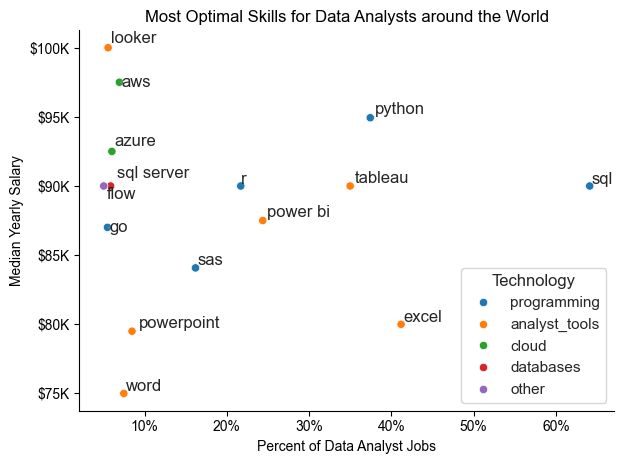

In [17]:
sns.scatterplot(
    data=df_DA_skills_tech_high_demand,
    x='skill_percent',
    y='median_salary',
    hue='technology'
)

sns.despine()
sns.set_theme(style='ticks')

# Prepare texts for adjustText
texts = []
for i, txt in enumerate(df_DA_skills_high_demand.index):
    texts.append(plt.text(df_DA_skills_high_demand['skill_percent'].iloc[i], df_DA_skills_high_demand['median_salary'].iloc[i], txt))

# Adjust text to avoid overlap
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

# Set axis labels, title, and legend
plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Yearly Salary')
plt.title('Most Optimal Skills for Data Analysts around the World')
plt.legend(title='Technology')

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

# Adjust layout and display plot 
plt.tight_layout()
plt.show()